In [22]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import KFold
import operator
from pandas.tools.plotting import scatter_matrix
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [23]:
location = r'C:\Users\sneha\Documents\Machine Learning\Project\Machine Learning Dataset\Clean Data version 1\EURO_Dataset.csv'
data_euro = pd.read_csv(location)
data_euro

,id,loc,ccf,age,sex,painloc,painexer,relrest,pncaden,cp,...,om2,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,cathef,junk
0,3001,Switzerland,0,65,1,1,1,1,3,4,...,1,1,1,1,1,1,1,1,75,-9
1,3002,Switzerland,0,32,1,0,0,0,0,1,...,1,1,1,1,1,1,5,1,63,-9
2,3003,Switzerland,0,61,1,1,1,1,3,4,...,1,2,1,1,1,1,1,1,67,-9
3,3004,Switzerland,0,50,1,1,1,1,3,4,...,1,1,1,1,1,1,5,4,36,-9
4,3005,Switzerland,0,57,1,1,1,1,3,4,...,1,2,1,1,1,1,1,1,60,-9
5,3006,Switzerland,0,51,1,1,1,1,3,4,...,1,1,1,1,1,1,1,2,47,-9
6,3007,Switzerland,0,47,1,1,1,1,3,4,...,1,1,1,1,1,1,1,1,66,-9
7,3008,Switzerland,0,60,1,1,1,1,3,4,...,1,1,2,-9,-9,-9,-9,-9,75,-9
8,3009,Switzerland,0,55,1,0,0,0,0,2,...,1,1,1,1,1,1,1,1,57,-9
9,3010,Switzerland,0,53,1,1,1,1,3,4,...,1,1,1,1,1,1,1,1,70,-9


In [24]:
df_predictor = data_euro['num']
unused_cols = ['num','id','ccf','smoke', 'cigs','years','famhist','dummy','ca',
                'restckm','exerckm','restef','restwm','exeref','exerwm',
               'thalsev','thalpul','earlobe', 'lmt','ladprox',
               'laddist','diag','cxmain','ramus','om1','om2','rcaprox',
               'rcadist','lvx1', 'lvx2','lvx3','lvx4',
               'lvf','cathef','junk']
data_euro.drop(columns = unused_cols, axis = 1,inplace = True)
data_processed = pd.get_dummies(data_euro, columns = ['cp','restecg','slope','thal','loc'])

In [25]:
def standardize(df, col_name):
    mean = df[col_name].mean()
    sd = df[col_name].std()
    df[col_name] = (df[col_name]-mean)/float(sd)
    return df[col_name]
for i in list(data_processed.columns.values):
    data_processed[i] = standardize(data_processed,i)

In [26]:
#Creating target column with Binary Values
condition = df_predictor == 0
data_processed['target'] = np.where(condition, 0 , 1)

In [27]:
#Splitting into Train and Test Data
data = data_processed.as_matrix()
train_x, test_x, train_y, test_y = train_test_split(data[:, 0:-1], data[:,-1],
                                                        train_size=0.75)

In [78]:
# function takes a RF parameter and a ranger and produces a plot and dataframe of CV scores for parameter values
def evaluate_param(parameter, num_range, index):
    grid_search = GridSearchCV(RandomForestClassifier(random_state = 123), param_grid = {parameter: num_range})
    grid_search.fit(train_x, train_y)
    #print(grid_search.grid_scores_)
    df = {}
    for i, score in enumerate(grid_search.grid_scores_):
        df[score[0][parameter]] = score[1]
    
    df = pd.DataFrame.from_dict(df, orient='index')
    df.reset_index(level=0, inplace=True)
    df = df.sort_values(by='index')
 
    plt.subplot(3,2,index)
    plot = plt.plot(df['index'], df[0])
    plt.title(parameter)
    return plot, df

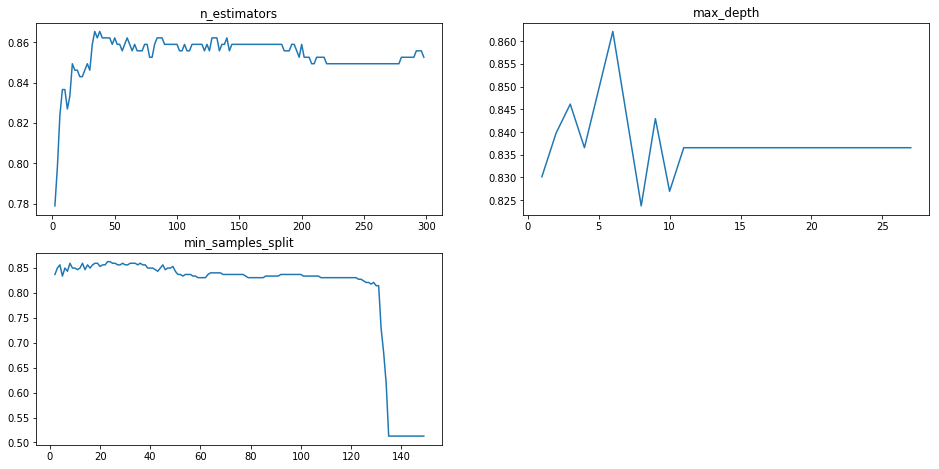

In [79]:
# parameters and ranges to plot
np.random.seed(80)
param_grid = {"n_estimators": np.arange(2, 300, 2),
              "max_depth": np.arange(1, 28, 1),
              "min_samples_split": np.arange(2,150,1)
             }
index = 1
plt.figure(figsize=(16,12))
for parameter, param_range in dict.items(param_grid):   
    evaluate_param(parameter, param_range, index)
    index += 1
plt.show()


In [7]:
#Grid Search for Hyperparameter Tuning
clf = RandomForestClassifier(random_state = 80)
param_grid = { 
           "criterion" : ['gini', 'entropy'],
           "n_estimators" : [45,46,47,48,49],
           "max_depth" : [6,7],
           "min_samples_split" : [22,23,24,25]          
           }
CV_rf = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 10)
CV_rf.fit(train_x, train_y)
print(CV_rf.best_params_)
print(CV_rf.grid_scores_)
#max_depth= 10, max_leaf_nodes= 54, min_samples_leaf= 19, n_estimators= 100, min_samples_split = 57, min_weight_fraction_leaf = 0.18
#max_depth= 10, max_leaf_nodes= 53, min_samples_leaf= 15, n_estimators= 90, min_samples_split = 55, min_weight_fraction_leaf = 0.2
#max_depth= 7, max_leaf_nodes= 44, min_samples_leaf= 2, n_estimators= 40, min_samples_split = 39, min_weight_fraction_leaf = 0.1

KeyboardInterrupt: 

In [28]:
#Building Random Forest Classifier

clf = RandomForestClassifier(random_state =80,criterion ='entropy',max_depth= 7,n_estimators= 47, min_samples_split = 23)
model = clf.fit(train_x,train_y)
predictions_test = model.predict(test_x)
predictions_train = model.predict(train_x)
accuracy_test = accuracy_score(test_y, predictions_test)
accuracy_train = accuracy_score(train_y, predictions_train)
print("Test Acuuracy :"+str(accuracy_test))
print("Training Acuuracy :"+str(accuracy_train))


Test Acuuracy :0.780952380952
Training Acuuracy :0.919871794872


Sensitivity :0.803278688525
Specificity :0.75


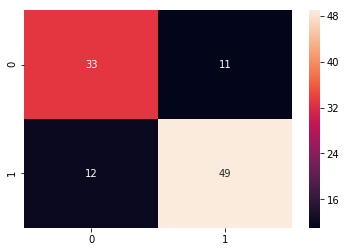

In [29]:
#Confusion matrix
cm = pd.DataFrame(confusion_matrix(test_y, predictions_test), columns = [0 ,1], index = [0,1])
print("Sensitivity :"+str(float(cm[1][1])/(cm[1][1]+cm[0][1])))
print("Specificity :"+str(float(cm[0][0])/(cm[0][0]+cm[1][0])))
sns.heatmap(cm, annot=True)
plt.show()

In [30]:
f = {}
df_tgt = data_processed['target']
for idx, col_name in enumerate(list(data_euro.columns.values)):
    f[col_name] = clf.feature_importances_[idx]
sorted_f = sorted(f.items(), key=operator.itemgetter(1),reverse=True)

In [31]:
sorted_f

[('cday', 0.1188725833766433),
 ('relrest', 0.10193029394381165),
 ('painloc', 0.10150309045253914),
 ('diuretic', 0.076317314622013882),
 ('nitr', 0.054587227985942365),
 ('thaltime', 0.050475201207085256),
 ('tpeakbps', 0.050309046778544218),
 ('thal', 0.043577595393118555),
 ('trestbps', 0.042960967229191453),
 ('trestbpd', 0.030188688596299213),
 ('xhypo', 0.027003070938192729),
 ('proto', 0.020689601017386136),
 ('painexer', 0.020088203732691438),
 ('loc', 0.016788195017969382),
 ('thaldur', 0.016476467051194977),
 ('pro', 0.014805044483223328),
 ('thalach', 0.014517163262945741),
 ('exang', 0.012413938910582251),
 ('age', 0.011603697876229618),
 ('met', 0.0098927083373925064),
 ('dm', 0.0088341261078026517),
 ('slope', 0.0074137311434140088),
 ('ekgday', 0.007175366578047006),
 ('pncaden', 0.0069716118786490805),
 ('thalrest', 0.006902789862447749),
 ('cmo', 0.0059570441057415855),
 ('oldpeak', 0.0057519461533922407),
 ('fbs', 0.0056438413397323786),
 ('rldv5e', 0.004398826149599

In [32]:
imp_features = []
for i in sorted_f[0:10]:
    k ,v = i
    k = i[0]
    imp_features.append(k)

In [33]:
imp_features

['cday',
 'relrest',
 'painloc',
 'diuretic',
 'nitr',
 'thaltime',
 'tpeakbps',
 'thal',
 'trestbps',
 'trestbpd']

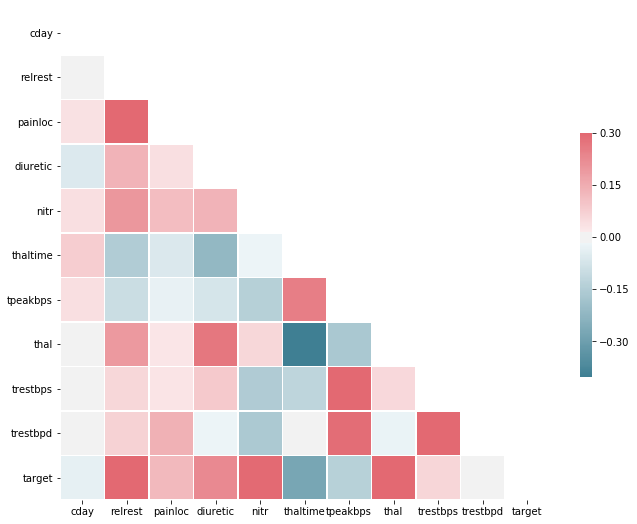

In [34]:
df_tgt = data_processed['target']
data_imp = data_euro[imp_features]
data_correlated_imp = pd.concat([data_imp,df_tgt],axis =1)
correlations = data_correlated_imp.corr()
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()